# Analyse de données sur les chansons de Spotify

## Partie 1 : Analyse graphique des données (Dataviz)

### Initialisation des données

In [1]:
#importation des librairies nécessaires
import numpy as np
import seaborn as sb
import matplotlib as mp
import pandas as pd
%matplotlib inline

data = pd.read_csv('./Data_Spotify/data.csv') #chargement de la data depuis le fichier CSV

data.info() #affichage des infos sur les types de données du dataset
data.head() #affichage des 5 premières lignes à titre d'illustration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


### Évolution de l'énergie moyenne des chansons

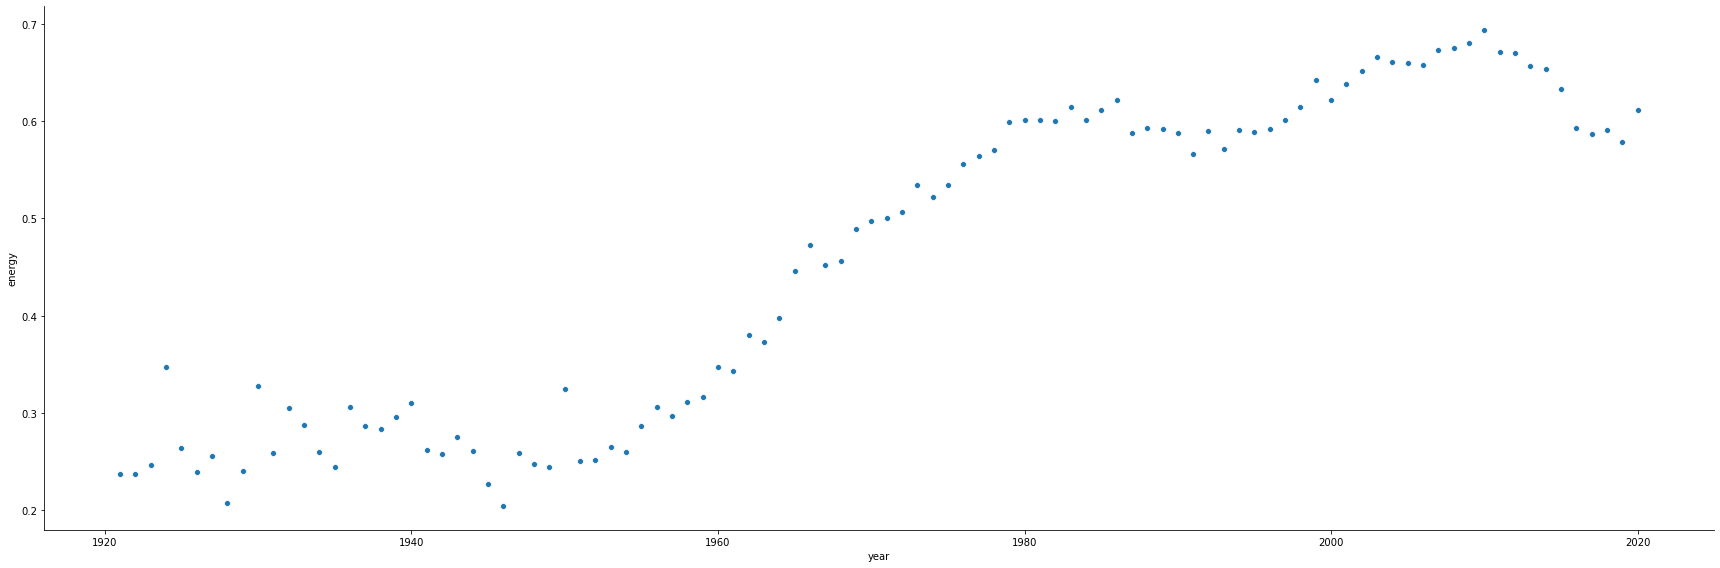

In [2]:
data["year"] = data["year"].map(lambda x: str(x) + '-01-01') #formatage du champ 'year' pour avoir une string compatible datetime
data['year'] = pd.to_datetime(data['year']) #transformer les dates en datetimes
dataPerYear = data.groupby(['year']).mean() #faire une moyenne de toutes les stats par année
dataPerYear['year'] = dataPerYear.index #'year' est devenu un index, le remettre en tant que champ
sb.relplot(x="year", y="energy", data=dataPerYear, height=8, aspect=3) #faire un graphique représentant l'énergie des musiques en fonction du temps

On remarque notamment une baisse de l'"énergie" moyennes des musiques depuis le début/milieu des années 2010. Cela peut s'expliquer par l'émergence de certains styles de musique au tempo plus lent et planant, notamment dans le rap.

### Répartition des contenus explicites

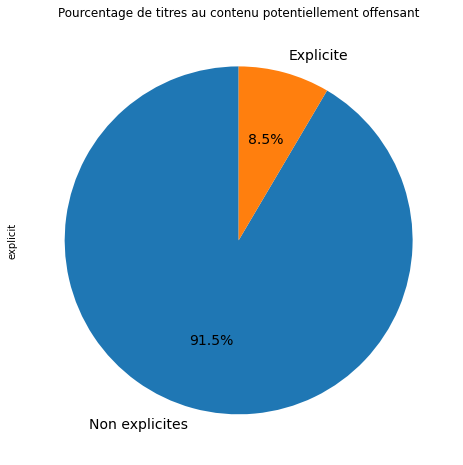

In [3]:
labels = 'Non explicites', 'Explicite' #préparation d'une liste de labels pour le graphique
#conception d'un camembert pour représenter la répartition des contenus explicites
data['explicit'].value_counts().plot(kind='pie',
                                figsize=(14,8),
                                title="Pourcentage de titres au contenu potentiellement offensant",
                                labels=labels,
                                startangle=90, autopct='%.1f%%',fontsize=14)

On a une large majorité de contenus non explicites.

### Répartition de la modalité des titres

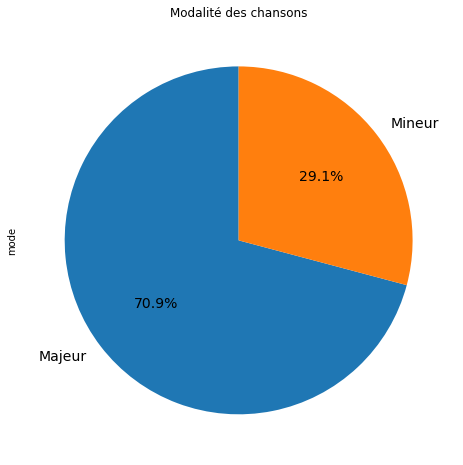

In [4]:
labels = 'Majeur', 'Mineur' #préparation d'une liste de labels pour le graphique
#conception d'un camembert pour représenter la répartition de la modalité des chansons
data['mode'].value_counts().plot(kind='pie',
                                figsize=(14,8),
                                title="Modalité des chansons",
                                labels=labels,
                                startangle=90, autopct='%.1f%%',fontsize=14)

On a une majorité de titres en modalité majeure.

### Répartition des chansons par clé dominante

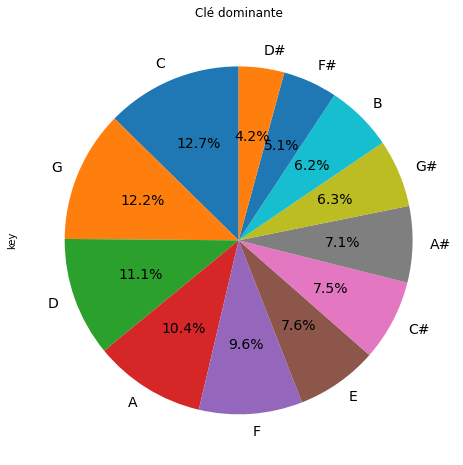

In [5]:
labels = 'C', 'G', 'D', 'A', 'F', 'E', 'C#', 'A#', 'G#', 'B', 'F#', 'D#' #préparation d'une liste de labels pour le graphique
#conception d'un camembert pour représenter la répartition des chansons par clé dominante
data['key'].value_counts().plot(kind='pie',
                                figsize=(14,8),
                                title="Clé dominante",
                                labels=labels,
                                startangle=90, autopct='%.1f%%',fontsize=14)

Aucune catégorie représente moins de 3% du total, donc il n'y a pas besoin de les regrouper

### Boites à moustache avec données extrêmes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
 15  genres            27621 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

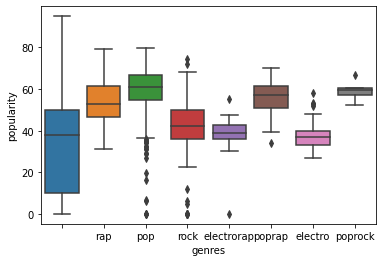

In [6]:
import re

genresToCompare = ['pop', 'rock', 'rap', 'electro'] #liste des genres que l'on veut comparer entre eux

#fonction que l'on applique sur chaque entrée une par une
def filterGenres(genres):
    genres = re.sub("'", '', genres).strip('][').split(', ') #faire passer les listes de genres du type string au type list
    genresToRemove = []
    for genre in genres: #on boucle sur les genres d'une chanson
        if genre not in genresToCompare: #si le genre ne fait pas partie de la liste de ceux à garder
            genresToRemove.append(genre) #on le stocke dans un tableau pour l'enlever après
    #on enlève les genres qu'on ne veut pas garder (on fait ça dans une deuxième boucle, sinon ça fait buguer la première parce que des éléments de la liste sont supprimées pendant la boucle)
    for genre in genresToRemove:
        genres.remove(genre)
    return ''.join(genres) #on retourne la liste de genres au format string

data_w_genres = pd.read_csv('./Data_Spotify/data_w_genres.csv') #chargement de la data depuis le fichier CSV

data_w_genres.info() #affichage des infos sur les types de données du dataset

data_w_genres["genres"] = data_w_genres["genres"].apply(filterGenres) #application d'une fonction sur toutes les entrées pour enlever les genres qu'on ne souhaite pas utiliser pour la comparaison

sb.boxplot(x="genres", y="popularity", data=data_w_genres) #conception de la boîte à moustaches qui représente la popularité des chansons en fonction de leur genre

On observe que le genre le plus populaire sur Spotify est la pop.

### Heatmap + observations sur les corrélations

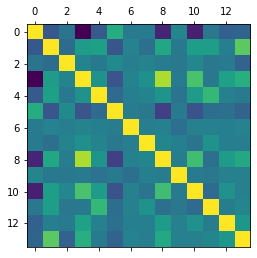

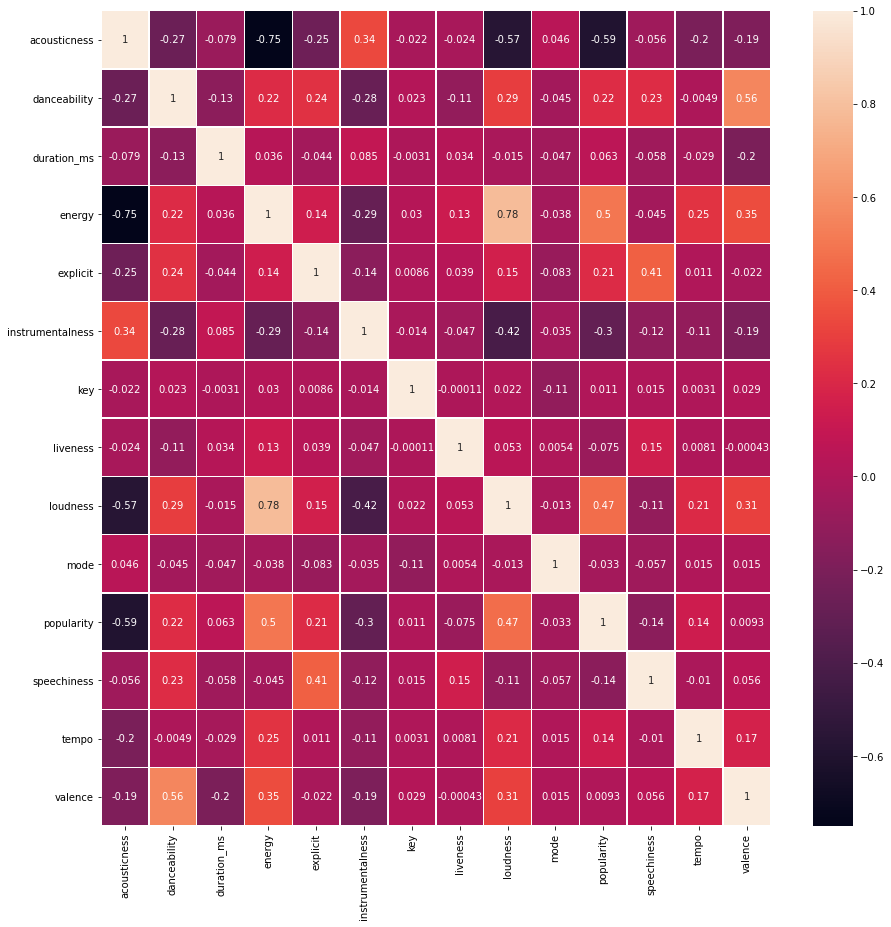

In [7]:
correlationMatrix = data.corr()
mp.pyplot.matshow(correlationMatrix)
mp.pyplot.show()

fig, ax = mp.pyplot.subplots(figsize=(15,15))
sb.heatmap(correlationMatrix, annot=True, linewidths=.5, ax=ax)

On remarque entre autres que :
* Les musiques les plus énergiques sont aussi les plus bruyantes
* Les musiques les plus énergiques et les plus bruyantes ont tendance à êtres populaires
* Les musiques dans lesquelles il y a le plus de paroles ont plus tendance à être définies comme "explicites" (notamment le rap)
* Les musiques dansantes, énergiques et bruyantes sont généralement positives (valence)

## Partie 2: Model Building

### Random Forest Model

#### Définition des variables features et de la target + split

In [8]:
from sklearn.model_selection import train_test_split

#définition des variables features dont nous allons analyser l'influence sur la target
X=data[['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']]
#définition de la variable cible
Y=data['popularity']

#split des variables : 70% serviront à l'entraînement et 30% au test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#### Entraînement du classifieur

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features="auto") #on crée un modèle Random Forest

clf.fit(X_train, Y_train) #on l'entraîne

Y_pred = clf.predict(X_test) #on récupère sa prédiction basée sur son entraînement

#### Affichage de l'accuracy du classifieur

In [10]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred)) #affichage de la précision des prédictions du modèle

Accuracy: 0.16838326172679655


#### Variation des paramètres

In [11]:
clf2 = RandomForestClassifier(n_estimators=4, max_depth=4, max_features="log2") #on fait un autre classifieur avec d'autres paramètres pour comparer au premier
clf2.fit(X_train, Y_train) #on l'entraîne
Y_pred_2 = clf2.predict(X_test) #on récupère la prédiction du classifieur
accuracy_2 = metrics.accuracy_score(Y_test, Y_pred_2)
print("Accuracy:", accuracy_2) #affichage de la précision des prédictions du classifieur

Accuracy: 0.15827987365860358


In [12]:
#on refait un troisième classifieur avec encore d'autres paramètres
clf3 = RandomForestClassifier(n_estimators=20, max_depth=1, max_features=0.5)
clf3.fit(X_train, Y_train)
Y_pred_3 = clf3.predict(X_test)
accuracy_3 = metrics.accuracy_score(Y_test, Y_pred_3)
print("Accuracy:", accuracy_3)

Accuracy: 0.1579267455319483


Le meilleur paramétrage est de peu le premier. Le modèle est en underfitting au vu de la faible précision.

## Partie 3: Features Importance

### Afficher les features importances

In [13]:
#on récupère l'importance de toutes les variables features pour voir celles qui ont le plus d'influence sur la variable cible
feature_imp = pd.Series(clf.feature_importances_, index=['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']).sort_values(ascending=False)
feature_imp

acousticness        0.123643
speechiness         0.095563
loudness            0.093514
energy              0.093342
duration_ms         0.092309
valence             0.087635
danceability        0.087485
tempo               0.087472
liveness            0.086760
instrumentalness    0.071575
key                 0.058807
mode                0.017609
explicit            0.004288
dtype: float64

### Afficher graphiquement les features importances  

No handles with labels found to put in legend.


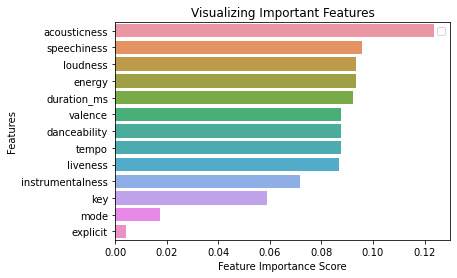

In [14]:
import matplotlib.pyplot as plt

sb.barplot(x=feature_imp, y=feature_imp.index) #on prépare un graphique pour représenter visuellement l'importance des différentes features

plt.xlabel('Feature Importance Score') #légende de l'axe horizontal
plt.ylabel('Features') #légende de l'axe vertical
plt.title("Visualizing Important Features") #titre du graphique
plt.legend()
plt.show() #on trace le graphique

## Partie 4: Model Réexécution avec les features sélectionnés

In [15]:
X=data[['acousticness', 'speechiness', 'energy', 'duration_ms', 'loudness']] #on garde uniquement les features qui ont une certaine influence
y=data['popularity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

new_clf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features="auto") #on refait un classifieur avec les paramètres qui se sont avérés être les plus efficaces pour la précision

new_clf.fit(X_train, Y_train) #on l'entraîne

Y_pred = new_clf.predict(X_test) #on récupère sa prédiction

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred)) #on affiche sa précision

Accuracy: 0.1637925960802778


On observe que la précision ne baisse que très peu en enlevant les features qui ont peu d'influence.